This is the set up for a 1D, Heat equation. Dirichlet BC at x=0, and  Neumann BC, flux=0 at X=L

In [269]:
import numpy
from scipy.linalg import solve

This next code will generate our "A" matrix

In [270]:
def generateMatrix(N, sigma):
    
    #This matrix is specific to the BC
    
    d= numpy.diag(numpy.ones(N-2)*2*(1+1/sigma))  #sets up the diagnol
    
    d[-1,-1] = 1+2/sigma  #sets up the Neumann BC
    
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)  #upper diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)  #Lower diagonal
    
    A = d + ud + ld
    
    return A

In [271]:
M=10
sigmas=0.5

AA=generateMatrix(M, sigmas)
print(AA)

[[ 6. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  5.]]


ok, looks good, now we write a function to give us the RHS

In [272]:
def generateRHS(T, sigma):
    
    b = T[:-2] + T[2:] + T[1:-1]*2*(1/sigma -1)
    
    b[0] += T[0] #Dirichlet BC
    
    return b

In [273]:
sigman=0.5
TT=numpy.zeros(20)
TT[0]=100
RRHS=generateRHS(TT, sigman)
print(RRHS)

[ 200.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.]


now we need to solve the system of linear equations at every time step, first create a function to implement the Crank-Nicolson scheme

In [274]:
def CrankNicolson(T, A, nt, sigma):
    
    for t in range(nt):
        
        Tn=T.copy()
        
        b = generateRHS(Tn, sigma)
        
        T_interior = solve(A,b)
        
        T[1:-1] = T_interior
        
        T[-1]=T[-2] #nuemann BC
        
    return T

In [275]:
#Some initial paramaters

L=1
nx=21
dx= L/(nx-1)
alpha = 1.22e-3

Ti=numpy.zeros(nx)
Ti[0]=100  #Dirichlet BC

sigma = 0.5
dt = sigma*dx*dx/alpha
nt = 10

A=generateMatrix(nx, sigma)


In [276]:
print(A)

[[ 6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0

In [277]:
T = CrankNicolson(Ti.copy(), A, nt, sigma)

In [278]:
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

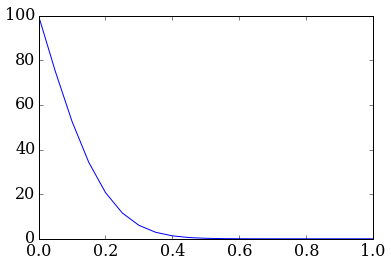

In [279]:
x = numpy.linspace(0, L, nx)

pyplot.plot(x, T)

has elements of both implicit and explicit schemes. Will discover that it is unconditonally stable

In [280]:
from math import pi


In [281]:
def T_analytical(x, t, n_max, alpha, L):
    
    T=100
    
    for n in range(1, n_max+1):
        
        k = (2*n-1)*pi/(2*L)
        
        summation = 400/((2*n-1)*pi)*numpy.sin(k*x)*numpy.exp(-alpha*t*k**2)
        
        T -= summation
        
    return T

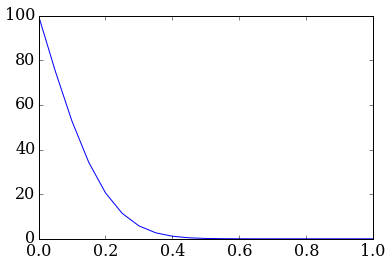

In [282]:
T_exact = T_analytical(x, dt*nt, 100, alpha, L)

pyplot.plot(x, T_exact)

In [283]:
T1 = T_analytical(x, 0.2, 100, alpha, L)
T2 = T_analytical(x, 0.2, 200, alpha, L)

numpy.sqrt(numpy.sum((T1-T2)**2)/numpy.sum(T2**2))   #Not sure what this square root is all about...

6.9279171182600936e-13

Now we are testing to prove that the CrankNicolson Scheme is second order accurate. Test different values of dt

starting at T=1 instead of T=0 to avoid the sharp jump, since T=0 is 100

In [284]:
def L2_error(T, T_exact):
    
    e = numpy.sqrt(numpy.sum((T-T_exact)**2)/numpy.sum(T_exact)**2)
    
    return e

below codes is from notebook 2, we will use it to compare the CrankNicolson to the backward time centered space scheme


In [285]:
def generateMatrix_btcs(N, sigma):
    
    d = numpy.diag(numpy.ones(N-2)*(2+1/sigma))
    d[-1,-1]=1+1/sigma
    ud = numpy.diag(numpy.ones(N-3)*-1,1)
    ld = numpy.diag(numpy.ones(N-3)*-1,-1)
    
    A= d + ud + ld
    
    return A

In [286]:
def generateRHS_btcs(T, sigma):
    
    b = numpy.zeros_like(T)
    b = T[1:-1]*1/sigma
    b[0] += T[0]
    
    return b

In [287]:
def implicit_btcs(T, A, nt, sigma):
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS_btcs(Tn, sigma)
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        T[-1]=T[-2]
        
    return T

In [288]:
#some initial parameters

nx = 1001
dx = L/(nx-1)

dt_values = numpy.asarray([1.0, 0.5, 0.25, 0.125])

error = numpy.zeros(len(dt_values))
error_ftcs = numpy.zeros(len(dt_values))

t_final = 10
t_initial = 1

x = numpy.linspace(0, L, nx)

Ti = T_analytical(x, t_initial, 100, alpha, L)
T_exact = T_analytical(x, t_final, 100, alpha, L)

for  i,dt in enumerate(dt_values):
    
    sigma = alpha*dt/dx**2
    
    nt = int((t_final-t_initial)/dt)
    
    A = generateMatrix( nx, sigma)
    
    A_btcs = generateMatrix_btcs(nx, sigma)
    
    T = CrankNicolson(Ti.copy(), A, nt, sigma)
    
    error [i] = L2_error(T, T_exact)
    
    T= implicit_btcs(Ti.copy(), A_btcs, nt, sigma)
    
    error_ftcs[i] = L2_error(T, T_exact)

In [289]:
error

array([  3.81125927e-05,   9.41813943e-06,   2.25089054e-06,
         4.63970974e-07])

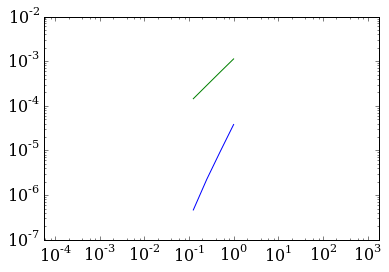

In [290]:
pyplot.axis('equal')
pyplot.loglog(dt_values, error)
pyplot.loglog(dt_values, error_ftcs)

btcs is green, CrankNicolson is blue, shows that the error drops 4x when the timestep is halfed. Also Crank Nicolson converges faster and is shifted down, so it is more accurate

now we look at spatial convergence

In [291]:
nx_values = numpy.asarray([11, 21, 41, 81, 161])

dt = 0.1

error = numpy.zeros(len(nx_values))
t_final = 20

x = numpy.linspace(0, L, nx)

for i,nx in enumerate(nx_values):
    
    dx = L/(nx-1)
    x = numpy.linspace(0, L, nx)
    
    sigma = alpha*dt/dx**2
    
    nt = int(t_final/dt)
    
    A = generateMatrix(nx, sigma)
    
    Ti = numpy.zeros(nx)
    Ti[0]=100
    
    T = CrankNicolson(Ti.copy(), A, nt, sigma)
    
    T_exact = T_analytical(x, t_final, 100, alpha, L)
    
    error[i] = L2_error(T, T_exact)
    

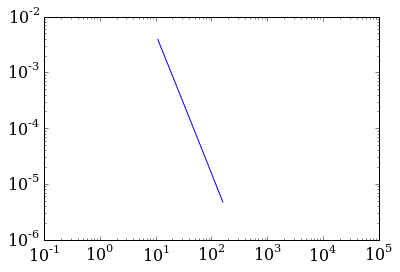

In [292]:
pyplot.axis('equal')
pyplot.loglog(nx_values, error)

now same thing but make t_final = 1000

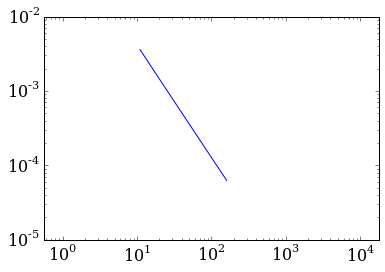

In [293]:
nx_values = numpy.asarray([11, 21, 41, 81, 161])

dt = 0.1

error = numpy.zeros(len(nx_values))
t_final = 1000

x = numpy.linspace(0, L, nx)

for i,nx in enumerate(nx_values):
    
    dx = L/(nx-1)
    x = numpy.linspace(0, L, nx)
    
    sigma = alpha*dt/dx**2
    
    nt = int(t_final/dt)
    
    A = generateMatrix(nx, sigma)
    
    Ti = numpy.zeros(nx)
    Ti[0]=100
    
    T = CrankNicolson(Ti.copy(), A, nt, sigma)
    
    T_exact = T_analytical(x, t_final, 100, alpha, L)
    
    error[i] = L2_error(T, T_exact)
    
pyplot.axis('equal')
pyplot.loglog(nx_values, error)

In [294]:
error

array([  3.59569224e-03,   1.34923182e-03,   4.90905474e-04,
         1.76021088e-04,   6.26681531e-05])

now the convergance isn't as good. Not quite as good as second order, but, not as bad as first order

this result is due to what we chose as the bc for the Neumann boundary. It is a first order approximation only and it can affect our convergence